# Exploratory Data Analysis ANZ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

In [4]:
dataset = pd.read_csv("Untitled Folder/ANZ synthesised transaction dataset.csv")
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
#removing irrelevant columns
irrelevent_cols=['status','card_present_flag','bpay_biller_code','currency',
                 'merchant_id','merchant_code','merchant_suburb','merchant_state',
                 'country','merchant_long_lat','movement','long_lat',
                 'txn_description','extraction','transaction_id']
dataset.drop(irrelevent_cols,axis=1,inplace=True)
dataset=dataset.reset_index(drop=True)
dataset.head()

,account,first_name,balance,date,gender,age,amount,customer_id
0,ACC-1598451071,Diana,35.39,01-08-2018,F,26,16.25,CUS-2487424745
1,ACC-1598451071,Diana,21.20,01-08-2018,F,26,14.19,CUS-2487424745
2,ACC-1222300524,Michael,5.71,01-08-2018,M,38,6.42,CUS-2142601169
3,ACC-1037050564,Rhonda,2117.22,01-08-2018,F,40,40.90,CUS-1614226872
4,ACC-1598451071,Diana,17.95,01-08-2018,F,26,3.25,CUS-2487424745


In [6]:
#check for null value present
dataset.info()
print('\nNull Values: \n')
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   account      12043 non-null  object 
 1   first_name   12043 non-null  object 
 2   balance      12043 non-null  float64
 3   date         12043 non-null  object 
 4   gender       12043 non-null  object 
 5   age          12043 non-null  int64  
 6   amount       12043 non-null  float64
 7   customer_id  12043 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 752.8+ KB

Null Values: 



account        0
first_name     0
balance        0
date           0
gender         0
age            0
amount         0
customer_id    0
dtype: int64

PREPARING THE DATASET

In [7]:
dataset['customer_id'].nunique()

100

In [8]:
customer_data=[]

for cust in list(dataset['customer_id'].unique()):
    salary_txns_subset = dataset[dataset['customer_id'] == cust]
    salary_txns_subset = salary_txns_subset.reset_index(drop=True)
    account = salary_txns_subset['account'][0]
    first_name = salary_txns_subset['first_name'][0]
    gender = salary_txns_subset['gender'][0]
    age = salary_txns_subset['age'][0]
    avg_balance = round(sum(salary_txns_subset['balance']) / len(salary_txns_subset), 2)
    avg_salary = round(sum(salary_txns_subset['amount']) / len(salary_txns_subset), 2)
    row = (cust, account, first_name, gender, age,avg_balance, avg_salary, round(avg_salary*12,2))
    customer_data.append(row)
    
customer_df = pd.DataFrame(customer_data, columns = ('customer_id','account','first_name','gender',
                                                     'age','avg_balance','avg_salary','annual_salary'))

In [9]:
#creating dummy variables for gender
customer_df = pd.get_dummies(customer_df,columns=['gender'],drop_first=True)

DATA VISUALISATION

Text(0, 0.5, 'Annual Salary')

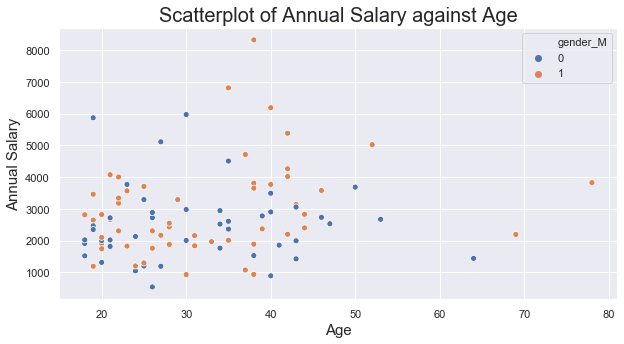

In [10]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", hue = 'gender_M', data=customer_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

Text(0, 0.5, 'Annual Salary')

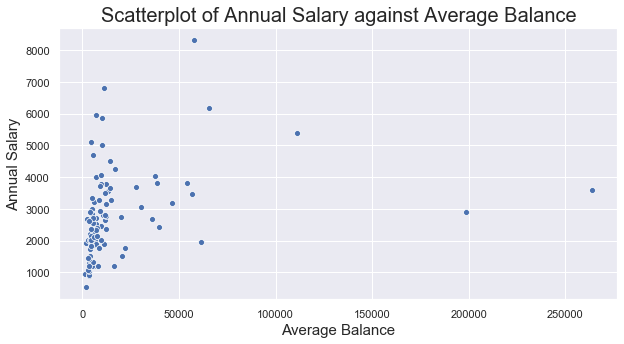

In [11]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="avg_balance", y="annual_salary", data=customer_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Average Balance",fontsize=20)
age_salary_graph.set_xlabel("Average Balance", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

LINEAR REGRESSION

In [12]:
#splitting data
train,test = train_test_split(customer_df, test_size=0.3)
X = train[['age', 'avg_balance','gender_M']]
y = train['annual_salary']
X_test = test[['age', 'avg_balance','gender_M']]
y_test = test['annual_salary']

In [15]:
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.056299841271766675

In [16]:
y_pred = reg.predict(X_test)

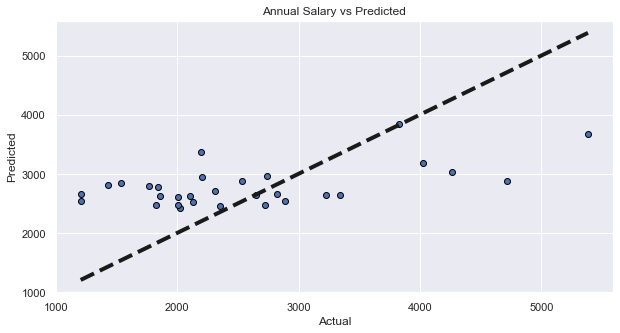

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [19]:
# root mean square error
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

883.7742014930403


DECISION TREE

In [20]:
model = DecisionTreeRegressor(max_depth=0.5, random_state=0)
model.fit(X,y)
model.score(X,y)

2.220446049250313e-16

In [21]:
y_pred2 = model.predict(X_test)

print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred2)))

29.280889916218648


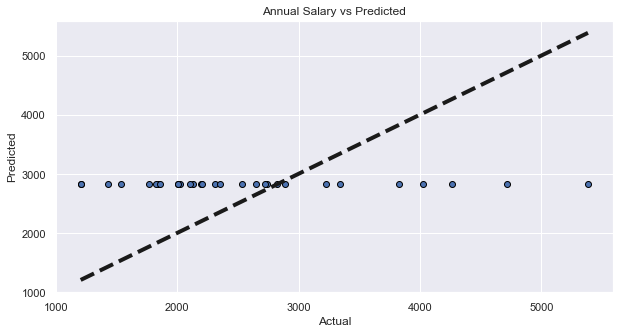

In [23]:
#Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred2, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()